In [2]:
import os
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob

In [3]:
os.chdir('F:\\GEOG458\\Geog458_final\\LC08_L1TP_041036_20181018_20181031_01_T1\\')

In [4]:
## background information about the Lidar image
with rasterio.open('LC08_L1TP_041036_20181018_20181031_01_T1_B1.TIF') as src:
    print(src.profile)

{'count': 1, 'crs': CRS({'init': u'epsg:32611'}), 'interleave': 'band', 'dtype': 'uint16', 'affine': Affine(30.0, 0.0, 263385.0,
       0.0, -30.0, 3948615.0), 'driver': u'GTiff', 'transform': (263385.0, 30.0, 0.0, 3948615.0, 0.0, -30.0), 'height': 7891, 'width': 7761, 'tiled': False, 'nodata': None}


In [5]:
## filter all files end with .tif and store them 
LS8_Bands = glob.glob("F:/GEOG458/Geog458_final/LC08_L1TP_041036_20181018_20181031_01_T1/*.tif")
LS8_Bands

['F:/GEOG458/Geog458_final/LC08_L1TP_041036_20181018_20181031_01_T1\\LC08_L1TP_041036_20181018_20181031_01_T1_B1.TIF',
 'F:/GEOG458/Geog458_final/LC08_L1TP_041036_20181018_20181031_01_T1\\LC08_L1TP_041036_20181018_20181031_01_T1_B2.TIF',
 'F:/GEOG458/Geog458_final/LC08_L1TP_041036_20181018_20181031_01_T1\\LC08_L1TP_041036_20181018_20181031_01_T1_B3.TIF',
 'F:/GEOG458/Geog458_final/LC08_L1TP_041036_20181018_20181031_01_T1\\LC08_L1TP_041036_20181018_20181031_01_T1_B4.TIF',
 'F:/GEOG458/Geog458_final/LC08_L1TP_041036_20181018_20181031_01_T1\\LC08_L1TP_041036_20181018_20181031_01_T1_B5.TIF',
 'F:/GEOG458/Geog458_final/LC08_L1TP_041036_20181018_20181031_01_T1\\LC08_L1TP_041036_20181018_20181031_01_T1_B6.TIF',
 'F:/GEOG458/Geog458_final/LC08_L1TP_041036_20181018_20181031_01_T1\\LC08_L1TP_041036_20181018_20181031_01_T1_B7.TIF',
 'F:/GEOG458/Geog458_final/LC08_L1TP_041036_20181018_20181031_01_T1\\LC08_L1TP_041036_20181018_20181031_01_T1_B8.TIF',
 'F:/GEOG458/Geog458_final/LC08_L1TP_041036_2018

Text(0, 0.5, 'Row #')

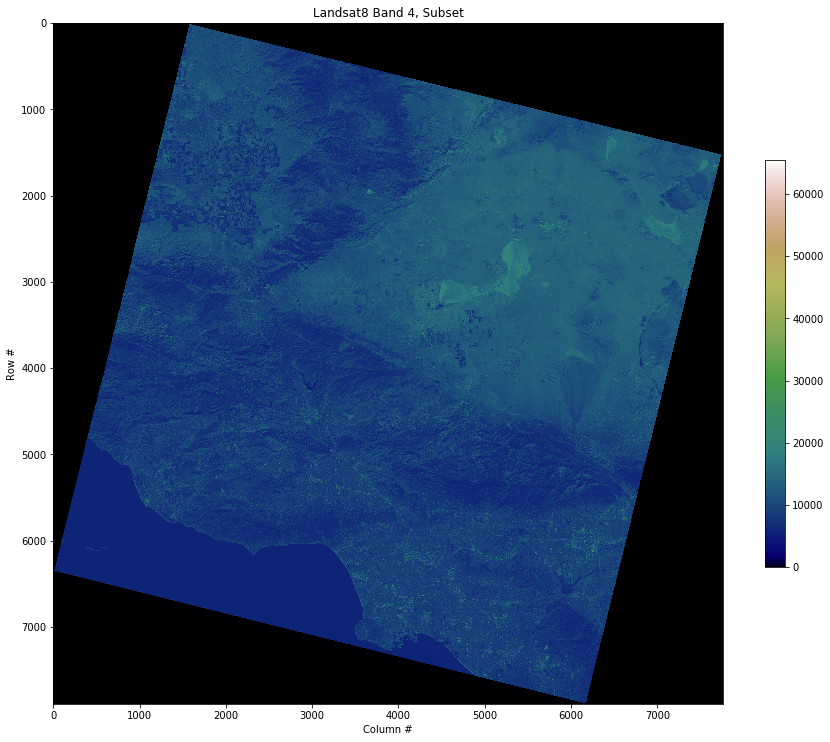

In [16]:
## Prefire Landsat 8 Band 4, full image
## Open Band 4 by using earthpy
with rasterio.open(LS8_Bands[3]) as src:
    LS8_Band4 = src.read(1)

plt.figure(figsize=(15,15))
plt.imshow(LS8_Band4, cmap = "gist_earth")
plt.colorbar(shrink=0.5)
plt.title('Landsat8 Band 4, Subset')
plt.xlabel('Column #')
plt.ylabel('Row #')


Text(0, 0.5, 'Row #')

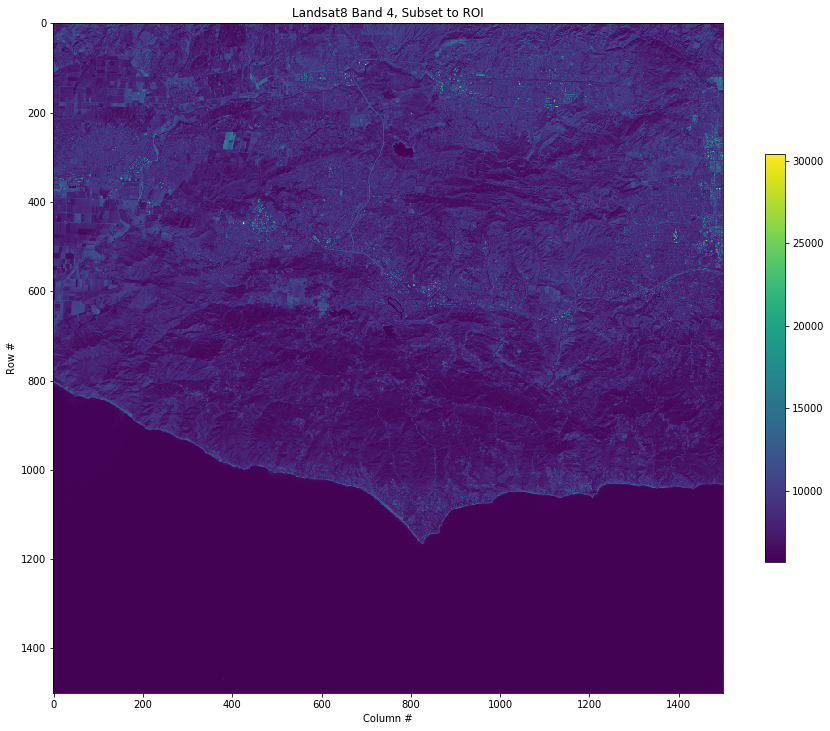

In [52]:
## Create a subset of the full resolution Landsat8 image 
##window = rasterio.windows.Window(1000, 4000, 2500, 2500)
window = rasterio.windows.Window(1500, 5000, 1500, 1500)

with rasterio.open('LC08_L1TP_041036_20181018_20181031_01_T1_B4.TIF') as src:
    subset = src.read(1, window=window)

plt.figure(figsize=(15,15))
plt.imshow(subset)
plt.colorbar(shrink=0.5)
plt.title('Landsat8 Band 4, Subset to ROI')
plt.xlabel('Column #')
plt.ylabel('Row #')


In [18]:
## create a stack of Lidar Images

landsat_path = "C:/Users/LXB19/Documents/GEOG458/Group6_Final/prefire_output/LS08_PreFire.tif"
##land_stack, land_meta = earthpy.spatial.stack(LS8_Bands, out_path= landsat_path)

(<Figure size 864x864 with 12 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002040328C128>,
       dtype=object))

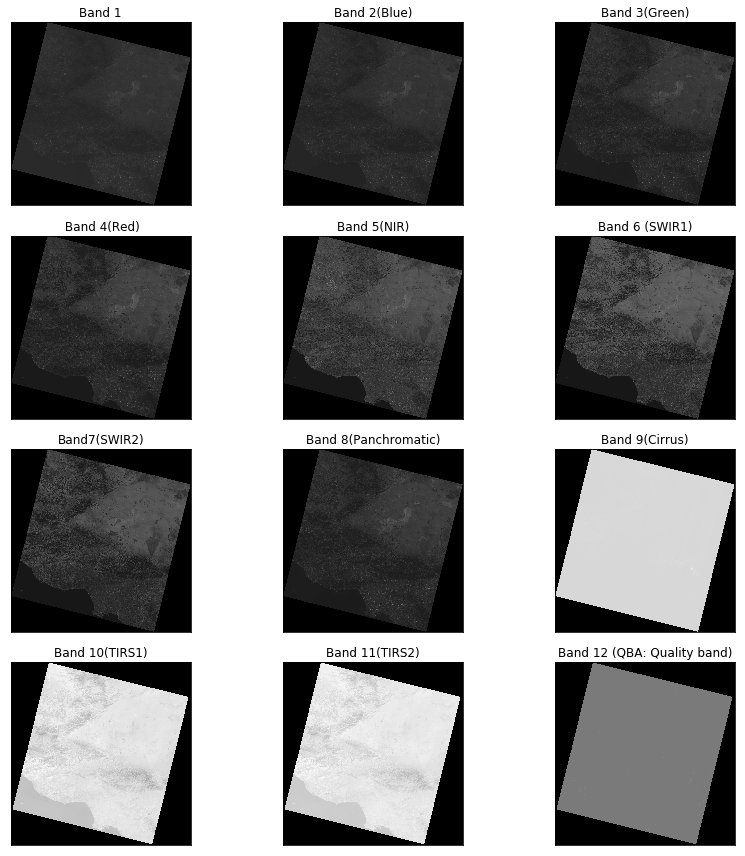

In [7]:
## Using earthpy to create a full stack of bands, Band 1 - 12. 

with rasterio.open(landsat_path) as src:
    landsat_prefire = src.read()
    
band_titles = ["Band 1", "Band 2(Blue)", "Band 3(Green)", " Band 4(Red)", "Band 5(NIR)",
               "Band 6 (SWIR1)", "Band7(SWIR2)", "Band 8(Panchromatic)", "Band 9(Cirrus)", 
               "Band 10(TIRS1)", "Band 11(TIRS2)", "Band 12 (QBA: Quality band)"]

ep.plot_bands(landsat_prefire, title = band_titles, cmap = "Greys_r")

In [45]:
# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min)) * 2


Text(0, 0.5, 'Row #')

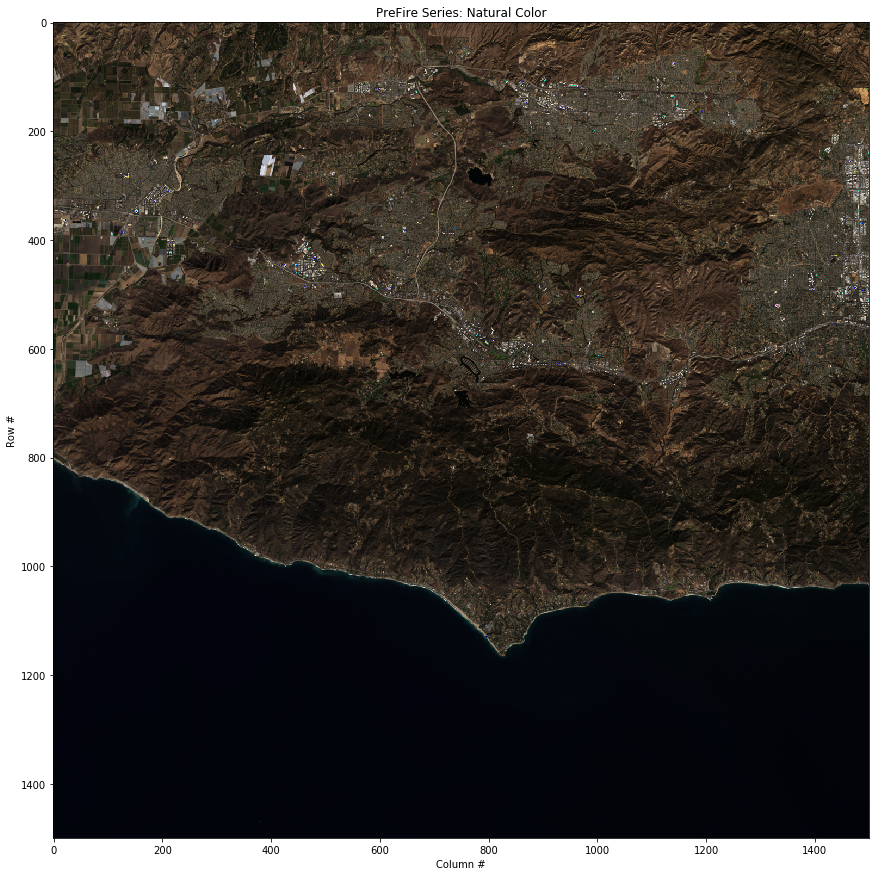

In [51]:
with rasterio.open(LS8_Bands[3]) as src:
    red_band = src.read(1, window=window)

with rasterio.open(LS8_Bands[2]) as src:
    green_band = src.read(1, window=window)

with rasterio.open(LS8_Bands[1]) as src:
    blue_band = src.read(1, window=window)

Nred = normalize(red_band)
Ngreen = normalize(green_band)
Nblue = normalize(blue_band)

rgb = np.dstack((Nred, Ngreen, Nblue))

plt.figure(figsize=(15,15))
plt.imshow((rgb * 255).astype(np.uint8))
plt.title('PreFire Series: Natural Color')
plt.xlabel('Column #')
plt.ylabel('Row #')

Text(0, 0.5, 'Row #')

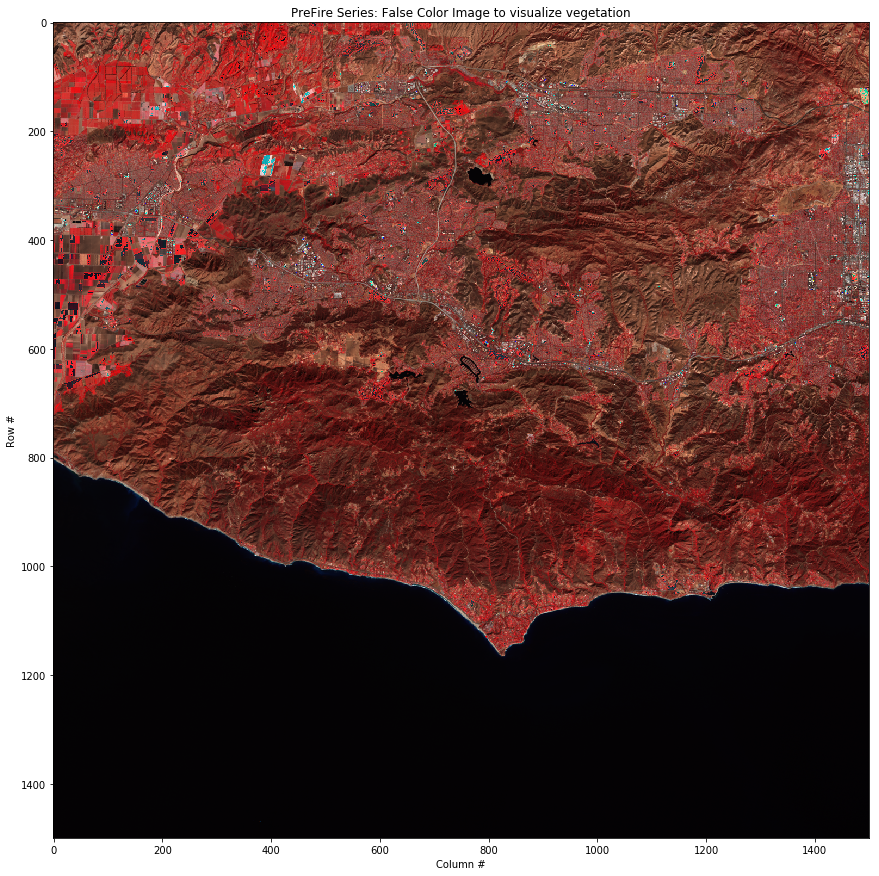

In [50]:
with rasterio.open(LS8_Bands[4]) as src:
    red_band = src.read(1, window=window)

with rasterio.open(LS8_Bands[3]) as src:
    green_band = src.read(1, window=window)

with rasterio.open(LS8_Bands[2]) as src:
    blue_band = src.read(1, window=window)

Nred = normalize(red_band)
Ngreen = normalize(green_band)
Nblue = normalize(blue_band)

FlaseColor = np.dstack((Nred, Ngreen, Nblue))

plt.figure(figsize=(15,15))
plt.imshow((FlaseColor * 255).astype(np.uint8))
plt.title('PreFire Series: False Color Image to visualize vegetation')
plt.xlabel('Column #')
plt.ylabel('Row #')

Text(0, 0.5, 'Row #')

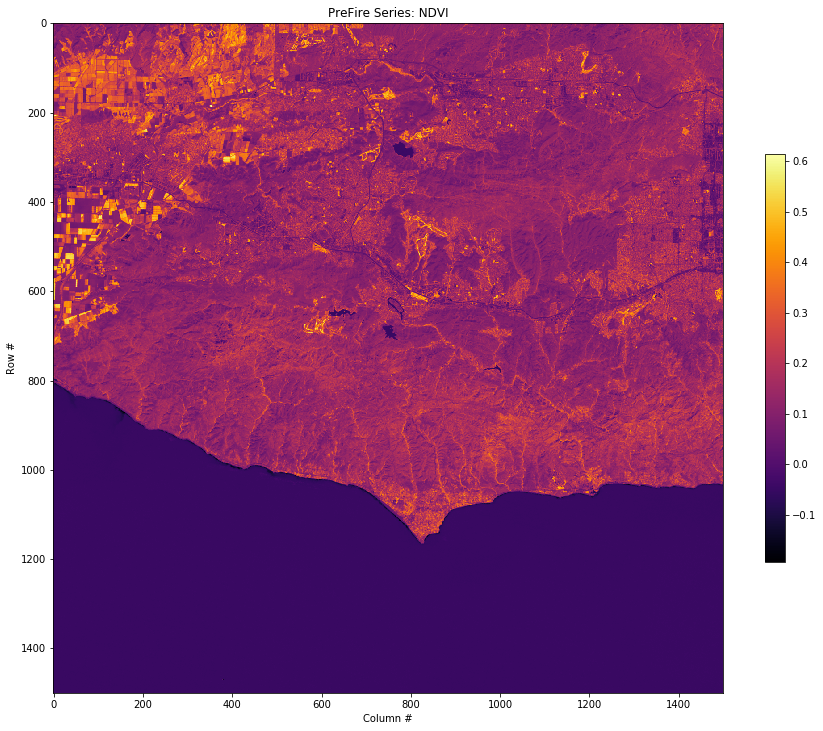

In [49]:
## calculate NDVI 

with rasterio.open(LS8_Bands[3]) as src :
    red = src.read(1, window=window)
    

with rasterio.open(LS8_Bands[4]) as src :
    NIR = src.read(1, window=window)

np.seterr(divide='ignore', invalid='ignore')

ndvi = (NIR.astype(float) - red.astype(float)) / (NIR.astype(float) + red.astype(float))
plt.figure(figsize=(15,15))
plt.imshow(ndvi,cmap='inferno')
plt.colorbar(shrink=0.5)
plt.title('PreFire Series: NDVI')
plt.xlabel('Column #')
plt.ylabel('Row #')

Text(0, 0.5, 'Row #')

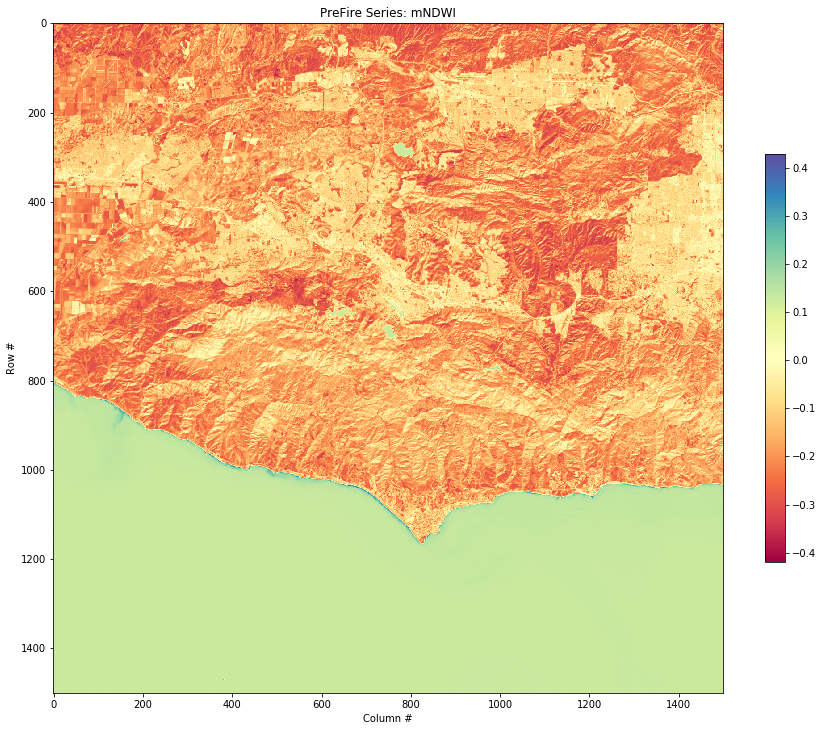

In [58]:
## mNDWI
with rasterio.open(LS8_Bands[2]) as src :
    green = src.read(1, window=window)
    
with rasterio.open(LS8_Bands[5]) as src :
    SWIR = src.read(1, window=window)

np.seterr(divide='ignore', invalid='ignore')

mNDWI = (green.astype(float) - SWIR.astype(float)) / (green.astype(float) + SWIR.astype(float))
plt.figure(figsize=(15,15))
plt.imshow(mNDWI,cmap='Spectral')
plt.colorbar(shrink=0.5)
plt.title('PreFire Series: mNDWI')
plt.xlabel('Column #')
plt.ylabel('Row #')


Text(0, 0.5, 'Row #')

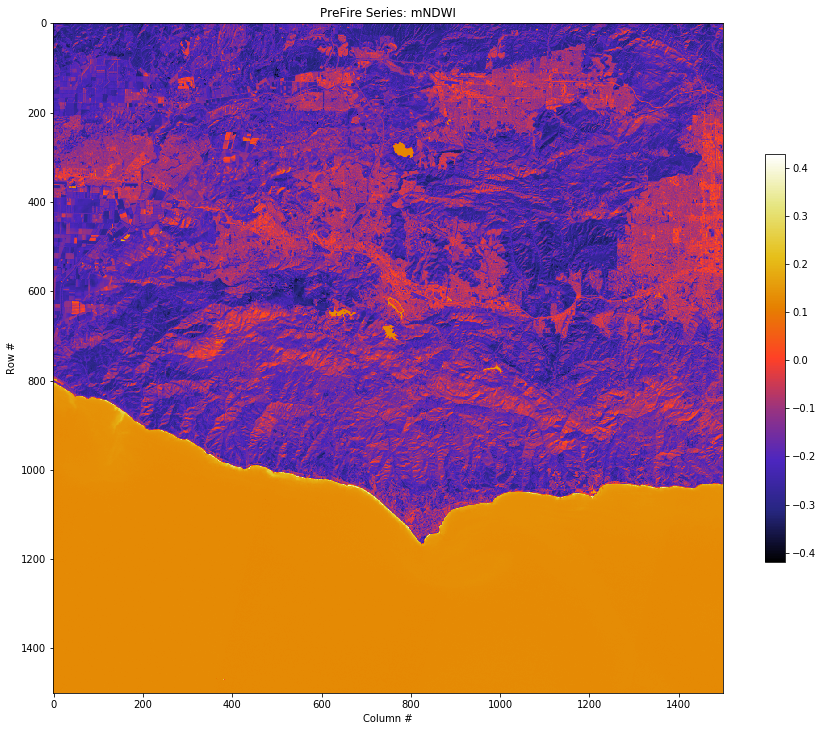

In [36]:
## Pre fire, Normalize Burn Ratio 


from colormap import cmap_builder, test_cmap

with rasterio.open(LS8_Bands[4]) as src :
    NIR = src.read(1, window=window)
    
with rasterio.open(LS8_Bands[5]) as src :
    SWIR = src.read(1, window=window)
    
np.seterr(divide='ignore', invalid='ignore')

pre_fire_NBR = (NIR.astype(float) - SWIR.astype(float)) / (NIR.astype(float) + SWIR.astype(float))

plt.figure(figsize=(15,15))
plt.imshow(mNDWI,cmap='CMRmap')
plt.colorbar(shrink=0.5)
plt.title('PreFire Series: mNDWI')
plt.xlabel('Column #')
plt.ylabel('Row #')




In [ ]:
## add person 2 here

In [ ]:
## my part based on person 2 and person 1

In [ ]:
from colormap import cmap_builder, test_cmap

with rasterio.open(filepath5) as src :
    niv = src.read(1, window=window)
    
with rasterio.open(filepath6) as src :
    swir = src.read(1, window=window)
    
np.seterr(divide='ignore', invalid='ignore')

post_fire_NBR = (niv.astype(float) - swir.astype(float)) / (niv.astype(float) + swir.astype(float))

plt.figure(figsize=(15,15))
plt.imshow(mNDWI,cmap='postmap')
plt.colorbar(shrink=0.5)
plt.title('PostFire Series: NBR')
plt.xlabel('Column #')
plt.ylabel('Row #')

In [ ]:
## Pre fire, Normalize Burn Ratio (NBR)

from colormap import cmap_builder, test_cmap

with rasterio.open(LS8_Bands[4]) as src :
    NIR = src.read(1, window=window)
    
with rasterio.open(LS8_Bands[5]) as src :
    SWIR = src.read(1, window=window)
    
np.seterr(divide='ignore', invalid='ignore')

pre_fire_NBR = (NIR.astype(float) - SWIR.astype(float)) / (NIR.astype(float) + SWIR.astype(float))

## Post fire, Normalize Burn Ratio (NBR)

with rasterio.open(filepath5) as src :
    niv = src.read(1, window=window)
    
with rasterio.open(filepath6) as src :
    swir = src.read(1, window=window)

post_fire_NBR = (niv.astype(float) - swir.astype(float)) / (niv.astype(float) + swir.astype(float))


DNBR = dnbr(pre_fire_nbr,post_fire_nbr)


plt.figure(figsize=(15,15))
plt.imshow(mNDWI,cmap='CMRmap')
plt.colorbar(shrink=0.5)
plt.title('PostFire Series: NBR')
plt.xlabel('Column #')
plt.ylabel('Row #')

## unfinished
# based on PostFire filenames

In [ ]:
# add person 4 here